In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split

## Precio alquiler

In [17]:
casas = pd.read_csv('/content/drive/MyDrive/jump2digital2023/2017_lloguer_preu_trim.csv')

Visualizo los datos del alquiler

In [18]:
casas.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


In [19]:
# % de Datos Faltantes
#casas.isna().mean().sort_values(ascending=False)

casas.isna().sum() / casas.shape[0]

Any               0.000000
Trimestre         0.000000
Codi_Districte    0.000000
Nom_Districte     0.000000
Codi_Barri        0.000000
Nom_Barri         0.000000
Lloguer_mitja     0.000000
Preu              0.065068
dtype: float64

In [20]:
# los barrios donde faltan los datos
casas[casas.isnull().any(axis=1)]['Codi_Barri'].value_counts()

12    8
42    8
58    8
47    6
56    6
54    2
Name: Codi_Barri, dtype: int64

Se puede ver que en los Barrios 12,42,58,47,56,54 faltan los precios por completo. Los precios del barrio 12,42,58 voy a rellenar con -1. Los de mas barrios con la media.

In [21]:
#casas.loc[casas["Codi_Barri"] == 12, "Preu"] = -1
casas.loc[casas['Codi_Barri'] == 12, 'Preu'] = -1
casas.loc[casas['Codi_Barri'] == 42, 'Preu'] = -1
casas.loc[casas['Codi_Barri'] == 58, 'Preu'] = -1

In [22]:
casas[casas.isnull().any(axis=1)]['Codi_Barri'].value_counts()

47    6
56    6
54    2
Name: Codi_Barri, dtype: int64

In [24]:
casas.query('Preu==-1')

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2017,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),-1.0
41,2017,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),-1.0
57,2017,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),-1.0
84,2017,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),-1.0
114,2017,2,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),-1.0
130,2017,2,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),-1.0
157,2017,3,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),-1.0
187,2017,3,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),-1.0
203,2017,3,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),-1.0
230,2017,4,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),-1.0


In [25]:
casas['Preu'] = casas['Preu'].fillna(casas[casas['Codi_Barri'] == 47].groupby('Lloguer_mitja')['Preu'].transform('mean'))

In [26]:
casas['Preu'] = casas['Preu'].fillna(casas[casas['Codi_Barri'] == 54].groupby('Lloguer_mitja')['Preu'].transform('mean'))

In [27]:
casas[casas["Codi_Barri"].isin([54])]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
53,2017,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),418.070000
126,2017,2,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),443.156667
199,2017,3,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),463.170000
272,2017,4,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),448.230000
345,2017,1,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),7.260000
418,2017,2,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),7.090000
491,2017,3,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),6.840000
564,2017,4,8,Nou Barris,54,Torre Baró,Lloguer mitjà per superfície (Euros/m2 mes),7.170000


In [28]:
casas[casas["Codi_Barri"].isin([56])]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
55,2017,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
128,2017,2,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),302.52
201,2017,3,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
274,2017,4,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
347,2017,1,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),NaN
420,2017,2,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),4.45
493,2017,3,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),NaN
566,2017,4,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),NaN


In [29]:
casas['Preu'] = casas['Preu'].fillna(casas[casas['Codi_Barri'] == 56].groupby('Lloguer_mitja')['Preu'].transform('mean'))

In [31]:
casas['Preu'] = casas['Preu'].fillna(casas[casas['Codi_Barri'] == 42].groupby('Lloguer_mitja')['Preu'].transform('mean'))
casas['Preu'] = casas['Preu'].fillna(casas[casas['Codi_Barri'] == 58].groupby('Lloguer_mitja')['Preu'].transform('mean'))

In [32]:
casas[casas.isnull().any(axis=1)]['Codi_Barri'].value_counts()

Series([], Name: Codi_Barri, dtype: int64)

Voy a pasar el Trimestre y Lloguer_mitja a columnas

In [33]:
casas =casas.pivot_table(index=['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'],
                          columns=['Trimestre','Lloguer_mitja'], values='Preu', aggfunc='first')

In [34]:
casas.shape

(73, 8)

Elimino multiindex

In [ ]:
casas.columns = [' '.join(str(col)).strip() for col in casas.columns.values]

In [ ]:
casas

( 1 ,   ' L l o g u e r   m i t j à   m e n s u a l   ( E u r o s / m e s ) ' )  \
Any  Codi_Districte Nom_Districte Codi_Barri Nom_Barri                                                                                                                       
2017 1              Ciutat Vella  1          el Raval                                                                                 734.99                                 
                                  2          el Barri Gòtic                                                                           905.26                                 
                                  3          la Barceloneta                                                                           722.78                                 
                                  4          Sant Pere, Santa Caterina i la Ribera                                                    895.28                                 
     2              Eixample      5          el Fort Pienc                                                                            871.08                                 
...                                                                                                                                      ...                                 
     10             Sant Martí    69         Diagonal Mar i el Front Marítim del Poblenou                                            1148.20                                 
                                  70         el Besòs i el Maresme                                                                    588.90                                 
                                  71         Provençals del Poblenou                                                                  999.62                                 
                                  72         Sant Martí de Provençals                                                                 742.06                                 
                                  73         la Verneda i la Pau                                                                      677.91                                 

                                                                                           ( 1 ,   ' L l o g u e r   m i t j à   p e r   s u p e r f í c i e   ( E u r o s / m 2   m e s ) ' )  \
Any  Codi_Districte Nom_Districte Codi_Barri Nom_Barri                                                                                                                                           
2017 1              Ciutat Vella  1          el Raval                                                                                  13.50                                                     
                                  2          el Barri Gòtic                                                                            14.14                                                     
                                  3          la Barceloneta                                                                            19.46                                                     
                                  4          Sant Pere, Santa Caterina i la Ribera                                                     15.01                                                     
     2              Eixample      5          el Fort Pienc                                                                             12.77                                                     
...                                                                                                                                      ...                                                     
     10             Sant Martí    69         Diagonal Mar i el Front Marítim del Poblenou                                              15.79                                                     
                                  70         el Besòs i el Maresme                

Renombro las columnas

In [35]:
casas=casas.reset_index()
casas.columns=['Any','Codi_Districte','Nom_Districte','Codi_Barri','Nom_Barri','T1_eurMes','T1_eurMetros','T2_eurMes','T2_eurMetros','T3_eurMes','T3_eurMetros','T4_eurMes','T4_eurMetros']
casas.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,T1_eurMes,T1_eurMetros,T2_eurMes,T2_eurMetros,T3_eurMes,T3_eurMetros,T4_eurMes,T4_eurMetros
0,2017,1,Ciutat Vella,1,el Raval,734.99,13.50,714.29,13.69,764.85,13.97,776.73,14.42
1,2017,1,Ciutat Vella,2,el Barri Gòtic,905.26,14.14,968.16,13.78,1028.49,14.43,993.16,14.41
2,2017,1,Ciutat Vella,3,la Barceloneta,722.78,19.46,738.25,19.87,758.18,19.72,766.03,20.33
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",895.28,15.01,930.13,15.99,927.16,16.16,914.78,15.66
4,2017,2,Eixample,5,el Fort Pienc,871.08,12.77,884.99,12.59,933.54,13.44,910.78,13.54


In [36]:
casas.shape

(73, 13)

In [37]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             73 non-null     int64  
 1   Codi_Districte  73 non-null     int64  
 2   Nom_Districte   73 non-null     object 
 3   Codi_Barri      73 non-null     int64  
 4   Nom_Barri       73 non-null     object 
 5   T1_eurMes       73 non-null     float64
 6   T1_eurMetros    73 non-null     float64
 7   T2_eurMes       73 non-null     float64
 8   T2_eurMetros    73 non-null     float64
 9   T3_eurMes       73 non-null     float64
 10  T3_eurMetros    73 non-null     float64
 11  T4_eurMes       73 non-null     float64
 12  T4_eurMetros    73 non-null     float64
dtypes: float64(8), int64(3), object(2)
memory usage: 7.5+ KB


Visualizo la informacion sobre las variables

In [38]:
# see precentege of missing value in each column

casas.isna().sum() / casas.shape[0]

Any               0.0
Codi_Districte    0.0
Nom_Districte     0.0
Codi_Barri        0.0
Nom_Barri         0.0
T1_eurMes         0.0
T1_eurMetros      0.0
T2_eurMes         0.0
T2_eurMetros      0.0
T3_eurMes         0.0
T3_eurMetros      0.0
T4_eurMes         0.0
T4_eurMetros      0.0
dtype: float64

Verifico si hay duplicados

In [39]:


casas.duplicated().any()



False

No hay datos duplicados

In [40]:
casas.describe().T

,count,mean,std,min,25%,50%,75%,max
Any,73.0,2017.000000,0.000000,2017.0,2017.00,2017.00,2017.00,2017.00
Codi_Districte,73.0,6.246575,2.807633,1.0,4.00,7.00,8.00,10.00
Codi_Barri,73.0,37.000000,21.217131,1.0,19.00,37.00,55.00,73.00
T1_eurMes,73.0,762.741644,295.827452,-1.0,634.54,722.78,876.97,1856.57
T1_eurMetros,73.0,11.603425,3.548639,-1.0,10.21,12.36,13.24,19.46
T2_eurMes,73.0,773.977900,299.681719,-1.0,647.69,749.61,899.89,1666.63
T2_eurMetros,73.0,11.847671,3.750062,-1.0,10.53,12.24,13.83,19.87
T3_eurMes,73.0,806.138904,317.293009,-1.0,670.43,777.64,922.75,1882.42
T3_eurMetros,73.0,12.219726,3.805149,-1.0,10.93,12.84,14.02,20.61
T4_eurMes,73.0,793.870685,301.265001,-1.0,672.70,772.86,910.78,1737.92


Estadistica descriptiva. Hay 73 barris, el precio Maximo al mes es 1882,42 del T3 y al m2 es 20,61 del T3 y el precio minimo al mes es 1666.63 corresponde al T2 y 19,46 euros m2 al T1

In [41]:
casas.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,T1_eurMes,T1_eurMetros,T2_eurMes,T2_eurMetros,T3_eurMes,T3_eurMetros,T4_eurMes,T4_eurMetros
0,2017,1,Ciutat Vella,1,el Raval,734.99,13.50,714.29,13.69,764.85,13.97,776.73,14.42
1,2017,1,Ciutat Vella,2,el Barri Gòtic,905.26,14.14,968.16,13.78,1028.49,14.43,993.16,14.41
2,2017,1,Ciutat Vella,3,la Barceloneta,722.78,19.46,738.25,19.87,758.18,19.72,766.03,20.33
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",895.28,15.01,930.13,15.99,927.16,16.16,914.78,15.66
4,2017,2,Eixample,5,el Fort Pienc,871.08,12.77,884.99,12.59,933.54,13.44,910.78,13.54


In [43]:
# Ver informacion  de las variabes categoricas

casas.describe(include = object)



,Nom_Districte,Nom_Barri
count,73,73
unique,10,73
top,Nou Barris,el Raval
freq,13,1


In [44]:
casas.isna().mean().sort_values(ascending=False)

Any               0.0
Codi_Districte    0.0
Nom_Districte     0.0
Codi_Barri        0.0
Nom_Barri         0.0
T1_eurMes         0.0
T1_eurMetros      0.0
T2_eurMes         0.0
T2_eurMetros      0.0
T3_eurMes         0.0
T3_eurMetros      0.0
T4_eurMes         0.0
T4_eurMetros      0.0
dtype: float64

Elimino las columnas año, districte, Nom_barri. El codigo del barrio me identifica los barrios

In [ ]:
casas.columns

Index(['Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
       'T1_eurMes', 'T1_eurMetros', 'T2_eurMes', 'T2_eurMetros', 'T3_eurMes',
       'T3_eurMetros', 'T4_eurMes', 'T4_eurMetros'],
      dtype='object')

In [45]:
casas = casas.drop(["Any", "Codi_Districte","Nom_Districte","Nom_Barri"], axis=1)
casas.head()

,Codi_Barri,T1_eurMes,T1_eurMetros,T2_eurMes,T2_eurMetros,T3_eurMes,T3_eurMetros,T4_eurMes,T4_eurMetros
0,1,734.99,13.50,714.29,13.69,764.85,13.97,776.73,14.42
1,2,905.26,14.14,968.16,13.78,1028.49,14.43,993.16,14.41
2,3,722.78,19.46,738.25,19.87,758.18,19.72,766.03,20.33
3,4,895.28,15.01,930.13,15.99,927.16,16.16,914.78,15.66
4,5,871.08,12.77,884.99,12.59,933.54,13.44,910.78,13.54


Calculo precio medio y la mediana por m2 y del precio medio de 4 tresmestres

In [46]:
casas['mediaMetros'] = casas[['T1_eurMetros', 'T2_eurMetros', 'T3_eurMetros','T4_eurMetros']].mean(axis=1)

In [47]:
casas['medianaMetros'] = casas[['T1_eurMetros', 'T2_eurMetros', 'T3_eurMetros','T4_eurMetros']].median(axis=1)

In [48]:
casas['medianaEurosMetros'] = casas[['T1_eurMes', 'T2_eurMes', 'T3_eurMes','T4_eurMes']].median(axis=1)

In [49]:
casas['mediaEurosMetros'] = casas[['T1_eurMes', 'T2_eurMes', 'T3_eurMes','T4_eurMes']].mean(axis=1)

In [50]:
casas.head()

,Codi_Barri,T1_eurMes,T1_eurMetros,T2_eurMes,T2_eurMetros,T3_eurMes,T3_eurMetros,T4_eurMes,T4_eurMetros,mediaMetros,medianaMetros,medianaEurosMetros,mediaEurosMetros
0,1,734.99,13.50,714.29,13.69,764.85,13.97,776.73,14.42,13.895,13.830,749.920,747.7150
1,2,905.26,14.14,968.16,13.78,1028.49,14.43,993.16,14.41,14.190,14.275,980.660,973.7675
2,3,722.78,19.46,738.25,19.87,758.18,19.72,766.03,20.33,19.845,19.795,748.215,746.3100
3,4,895.28,15.01,930.13,15.99,927.16,16.16,914.78,15.66,15.705,15.825,920.970,916.8375
4,5,871.08,12.77,884.99,12.59,933.54,13.44,910.78,13.54,13.085,13.105,897.885,900.0975


## Dataset soroll

In [90]:
ruido = pd.read_csv('/content/drive/MyDrive/jump2digital2023/2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv')

In [52]:
ruido.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98%
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,7.38%
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,11.97%
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,19.85%


Paso el valor a numerico quitando % y redondeo a 2 decimales.

In [91]:
ruido['Valor'] = round(ruido['Valor'].str.rstrip('%').astype(float) / 100,2)

In [75]:
ruido.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,0.08
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,0.27
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,0.07
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,0.12
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,0.20


In [92]:
ruido.describe().T

,count,mean,std,min,25%,50%,75%,max
Codi_Districte,18980.0,6.246575,2.788409,1.0,4.0,7.0,8.00,10.0
Codi_Barri,18980.0,37.000000,21.071863,1.0,19.0,37.0,55.00,73.0
Valor,18980.0,0.099998,0.232368,0.0,0.0,0.0,0.09,1.0


Estadistica descriptiva del DF ruido.

In [93]:
ruido.isna().mean().sort_values(ascending=False)


Codi_Districte    0.0
Nom_Districte     0.0
Codi_Barri        0.0
Nom_Barri         0.0
Concepte          0.0
Rang_soroll       0.0
Valor             0.0
dtype: float64

No hay datos faltantes en DF del ruido

No hay nulos

In [94]:
ruido.duplicated().any()


False

No hay duplicados

Voy a normalizar los datos de df del ruido agrupando por los barrios
StandarScaler sirve para estandarizar  datos, lo que significa que transforma los datos de manera que tengan una media de 0 y una desviación estándar de 1.
Elimina sesgos de escala: Las variables en los datos pueden tener diferentes escalas y magnitudes. Al estandarizar los datos, todas las variables se escalan de manera uniforme, lo que evita que las variables con magnitudes más grandes dominen el análisis en detrimento de las variables con magnitudes más pequeñas.

Facilita la interpretación: Con datos estandarizados, es más fácil interpretar los resultados del PCA, ya que las componentes principales están en la misma escala y tienen una interpretación más directa.
El PCA se basa en la matriz de covarianza de los datos. Estandarizar los datos asegura que la matriz de covarianza esté bien condicionada y facilite los cálculos en el PCA.

In [95]:
grupos = ruido.groupby('Codi_Barri')
scaler = StandardScaler()
# Itera a través de los grupos y estandariza la columna 'Valor' en cada grupo
for group_name, group_data in grupos:
    ruido.loc[group_data.index, 'Valor'] = scaler.fit_transform(group_data[['Valor']].values)


In [96]:
ruido.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,-0.084948
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,0.720511
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,-0.127341
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,0.084622
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,0.423763


In [97]:
ruido = ruido.pivot_table(index=['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri'],
                          columns=['Rang_soroll','Concepte'], values='Valor', aggfunc='first')

In [98]:
ruido.columns = [' '.join(str(col)).strip() for col in ruido.columns.values]

In [99]:
ruido=ruido.reset_index()

In [100]:
ruido.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,"( ' 4 0 - 4 5 d B ' , ' F F C C _ D ' )","( ' 4 0 - 4 5 d B ' , ' F F C C _ D E N ' )","( ' 4 0 - 4 5 d B ' , ' F F C C _ E ' )","( ' 4 0 - 4 5 d B ' , ' F F C C _ N ' )","( ' 4 0 - 4 5 d B ' , ' G I _ T R _ D ' )","( ' 4 0 - 4 5 d B ' , ' G I _ T R _ D E N ' )",...,"( ' > = 8 0 d B ' , ' T O T A L _ D ' )","( ' > = 8 0 d B ' , ' T O T A L _ D E N ' )","( ' > = 8 0 d B ' , ' T O T A L _ E ' )","( ' > = 8 0 d B ' , ' T O T A L _ N ' )","( ' > = 8 0 d B ' , ' T R A N S I T _ D ' )","( ' > = 8 0 d B ' , ' T R A N S I T _ D E N ' )","( ' > = 8 0 d B ' , ' T R A N S I T _ E ' )","( ' > = 8 0 d B ' , ' T R A N S I T _ N ' )","( ' > = 8 0 d B ' , ' V I A N A N T S _ D ' )","( ' > = 8 0 d B ' , ' V I A N A N T S _ E ' )"
0,1,Ciutat Vella,1,el Raval,-0.424089,-0.424089,-0.424089,-0.424089,-0.127341,-0.042556,...,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089
1,1,Ciutat Vella,2,el Barri Gòtic,-0.447711,-0.447711,-0.447711,-0.447711,1.297691,1.431953,...,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711
2,1,Ciutat Vella,3,la Barceloneta,-0.302912,-0.302912,-0.302912,-0.389316,0.431521,0.431521,...,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",-0.436641,-0.436641,-0.436641,-0.436641,0.304508,0.478896,...,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641
4,2,Eixample,5,el Fort Pienc,-0.438094,-0.394301,-0.438094,-0.438094,0.481549,0.437757,...,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094


In [101]:
ruido.columns

Index(['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
       '( ' 4 0 - 4 5   d B ' ,   ' F F C C _ D ' )',
       '( ' 4 0 - 4 5   d B ' ,   ' F F C C _ D E N ' )',
       '( ' 4 0 - 4 5   d B ' ,   ' F F C C _ E ' )',
       '( ' 4 0 - 4 5   d B ' ,   ' F F C C _ N ' )',
       '( ' 4 0 - 4 5   d B ' ,   ' G I _ T R _ D ' )',
       '( ' 4 0 - 4 5   d B ' ,   ' G I _ T R _ D E N ' )',
       ...
       '( ' > = 8 0   d B ' ,   ' T O T A L _ D ' )',
       '( ' > = 8 0   d B ' ,   ' T O T A L _ D E N ' )',
       '( ' > = 8 0   d B ' ,   ' T O T A L _ E ' )',
       '( ' > = 8 0   d B ' ,   ' T O T A L _ N ' )',
       '( ' > = 8 0   d B ' ,   ' T R A N S I T _ D ' )',
       '( ' > = 8 0   d B ' ,   ' T R A N S I T _ D E N ' )',
       '( ' > = 8 0   d B ' ,   ' T R A N S I T _ E ' )',
       '( ' > = 8 0   d B ' ,   ' T R A N S I T _ N ' )',
       '( ' > = 8 0   d B ' ,   ' V I A N A N T S _ D ' )',
       '( ' > = 8 0   d B ' ,   ' V I A N A N T S _ E ' )'],
      d

In [102]:
# Selecciona solo las columnas de características (sin la columna 'Codi_Barri', Codi_Districte,Nom_Districte,Nom_Barri)
ruido = ruido.sort_values(by='Codi_Barri', ascending=True)
X = ruido.drop(columns=['Codi_Barri','Codi_Districte','Nom_Districte','Nom_Barri'], axis=1)

# Escala los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Inicializa y ajusta el modelo PCA
pca = PCA()
pca.fit(X_scaled)

# Explora las componentes principales y la varianza explicada
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Elige el número de componentes principales que deseas retener (por ejemplo, el 95% de la varianza)
cumulative_explained_variance = explained_variance.cumsum()
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Transforma tus datos en el nuevo espacio de características con las componentes principales seleccionadas
X_pca = pca.transform(X_scaled)

n_components = 18
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)
X_pca_with_barrio = pd.concat([pd.DataFrame(X_pca, columns=[f'Componente_{i+1}' for i in range(n_components)]), ruido['Codi_Barri']], axis=1)

In [103]:
X_pca_with_barrio.shape

(73, 19)

In [104]:
X_pca_with_barrio

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10,Componente_11,Componente_12,Componente_13,Componente_14,Componente_15,Componente_16,Componente_17,Componente_18,Codi_Barri
0,-7.946488,2.435843,9.437822,5.512136,3.423377,-2.010139,-1.477506,0.461362,-0.231500,-1.389627,1.526676,0.577400,0.358357,1.361542,1.411191,1.119730,0.726231,1.529666,1
1,5.675644,0.609502,14.701688,13.620183,6.729349,-1.806504,-1.542896,0.677410,-1.584540,0.030668,1.161210,3.272414,0.540004,-1.771510,-3.900551,-0.662334,-1.528239,-2.558452,2
2,0.094213,4.568242,-2.078078,5.950627,2.153545,-0.555473,0.132555,-1.028243,-2.434276,-1.763745,-1.816984,-0.349373,-1.475831,1.639652,1.423265,0.998188,-0.883863,-0.309352,3
3,-0.108793,1.765933,11.785292,9.309097,4.999660,-0.816227,-0.885729,0.097699,-1.521027,1.201832,2.813806,0.598955,1.689089,0.201645,0.227253,0.006103,0.926472,-0.038859,4
4,5.396922,-10.528433,-1.259841,-2.130203,-0.247443,-0.722092,1.309302,2.299034,0.785827,-1.768247,1.905598,-1.630416,0.961471,-1.050660,-0.387321,0.682538,0.784107,-0.571026,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,25.421347,4.749767,2.609247,-3.228351,-7.025838,-1.703080,-3.306019,1.988201,-1.112060,1.322235,-4.922482,-1.624310,1.224585,2.382628,-3.501102,4.427355,-2.334538,1.574464,69
69,4.962976,11.147926,-1.398101,-6.233646,6.885213,-2.105878,1.980955,-5.308453,-0.306491,-0.819504,-2.524107,2.046084,-0.768411,-2.363570,-0.543644,2.200577,-0.756634,-2.646196,70
70,22.170010,4.732891,0.572480,-4.527242,-6.754053,-4.007568,1.064890,-2.385107,3.299150,0.942772,6.231917,3.864678,-1.456524,1.130767,-2.457304,1.191040,-0.512220,-0.363775,71
71,-0.110794,3.557049,-0.076487,-2.571866,-1.549129,-0.618674,-0.654212,-1.077813,-2.187474,1.236016,-0.123252,1.238508,-0.700362,0.695722,-0.264701,-1.319611,-1.010541,-0.596522,72


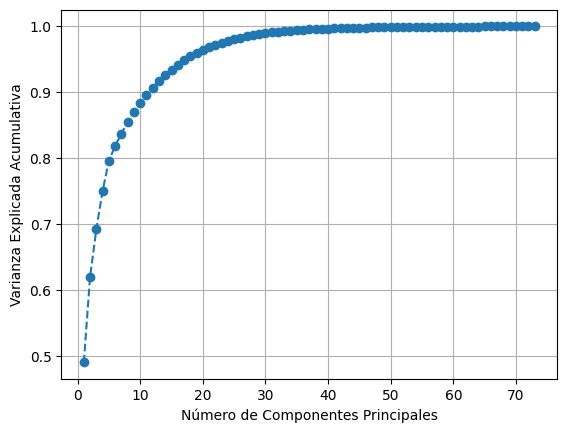

In [105]:
plt.plot(range(1, len(explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulativa')
plt.grid(True)
plt.show()

Con 11 componentes principales alcanzo 90% de Varianza explicada acumulada voy a coger 18 componentes principales que sera alrededor del 95% de la varianza explicada acumulativa. Retener el 95% de la varianza explicada significa que estoy manteniendo la gran mayoría de la información contenida en los datos originales. Esto es importante ya que quiero preservar la estructura y las relaciones entre las características mientras reduzco la dimensionalidad.

In [106]:
pca.explained_variance_ratio_

array([0.49047737, 0.12995894, 0.07222237, 0.05788275, 0.04555292,
       0.02266009, 0.0186608 , 0.01795064, 0.01483062, 0.01341616,
       0.01216021, 0.01156587, 0.01033877, 0.00895856, 0.00787569,
       0.00724223, 0.00714961, 0.00630565])

In [107]:
explained_variance = pca.explained_variance_ratio_
print("Varianza Explicada por Componente Principal:")
for i, varianza in enumerate(explained_variance):
    print(f"Componente Principal {i + 1}: {varianza:.4f}")

Varianza Explicada por Componente Principal:
Componente Principal 1: 0.4905
Componente Principal 2: 0.1300
Componente Principal 3: 0.0722
Componente Principal 4: 0.0579
Componente Principal 5: 0.0456
Componente Principal 6: 0.0227
Componente Principal 7: 0.0187
Componente Principal 8: 0.0180
Componente Principal 9: 0.0148
Componente Principal 10: 0.0134
Componente Principal 11: 0.0122
Componente Principal 12: 0.0116
Componente Principal 13: 0.0103
Componente Principal 14: 0.0090
Componente Principal 15: 0.0079
Componente Principal 16: 0.0072
Componente Principal 17: 0.0071
Componente Principal 18: 0.0063


In [109]:
ruido.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,"( ' 4 0 - 4 5 d B ' , ' F F C C _ D ' )","( ' 4 0 - 4 5 d B ' , ' F F C C _ D E N ' )","( ' 4 0 - 4 5 d B ' , ' F F C C _ E ' )","( ' 4 0 - 4 5 d B ' , ' F F C C _ N ' )","( ' 4 0 - 4 5 d B ' , ' G I _ T R _ D ' )","( ' 4 0 - 4 5 d B ' , ' G I _ T R _ D E N ' )",...,"( ' > = 8 0 d B ' , ' T O T A L _ D ' )","( ' > = 8 0 d B ' , ' T O T A L _ D E N ' )","( ' > = 8 0 d B ' , ' T O T A L _ E ' )","( ' > = 8 0 d B ' , ' T O T A L _ N ' )","( ' > = 8 0 d B ' , ' T R A N S I T _ D ' )","( ' > = 8 0 d B ' , ' T R A N S I T _ D E N ' )","( ' > = 8 0 d B ' , ' T R A N S I T _ E ' )","( ' > = 8 0 d B ' , ' T R A N S I T _ N ' )","( ' > = 8 0 d B ' , ' V I A N A N T S _ D ' )","( ' > = 8 0 d B ' , ' V I A N A N T S _ E ' )"
0,1,Ciutat Vella,1,el Raval,-0.424089,-0.424089,-0.424089,-0.424089,-0.127341,-0.042556,...,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089,-0.424089
1,1,Ciutat Vella,2,el Barri Gòtic,-0.447711,-0.447711,-0.447711,-0.447711,1.297691,1.431953,...,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711,-0.447711
2,1,Ciutat Vella,3,la Barceloneta,-0.302912,-0.302912,-0.302912,-0.389316,0.431521,0.431521,...,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518,-0.432518
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",-0.436641,-0.436641,-0.436641,-0.436641,0.304508,0.478896,...,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641,-0.436641
4,2,Eixample,5,el Fort Pienc,-0.438094,-0.394301,-0.438094,-0.438094,0.481549,0.437757,...,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094,-0.438094


Hago merge del dataframe de los precio de alquiler con el dataframe del ruido por el codigo del Barrio

In [110]:
resultado = pd.merge(casas, X_pca_with_barrio, on='Codi_Barri')

In [112]:
resultado.head()

,Codi_Barri,T1_eurMes,T1_eurMetros,T2_eurMes,T2_eurMetros,T3_eurMes,T3_eurMetros,T4_eurMes,T4_eurMetros,mediaMetros,...,Componente_9,Componente_10,Componente_11,Componente_12,Componente_13,Componente_14,Componente_15,Componente_16,Componente_17,Componente_18
0,1,734.99,13.50,714.29,13.69,764.85,13.97,776.73,14.42,13.895,...,-0.231500,-1.389627,1.526676,0.577400,0.358357,1.361542,1.411191,1.119730,0.726231,1.529666
1,2,905.26,14.14,968.16,13.78,1028.49,14.43,993.16,14.41,14.190,...,-1.584540,0.030668,1.161210,3.272414,0.540004,-1.771510,-3.900551,-0.662334,-1.528239,-2.558452
2,3,722.78,19.46,738.25,19.87,758.18,19.72,766.03,20.33,19.845,...,-2.434276,-1.763745,-1.816984,-0.349373,-1.475831,1.639652,1.423265,0.998188,-0.883863,-0.309352
3,4,895.28,15.01,930.13,15.99,927.16,16.16,914.78,15.66,15.705,...,-1.521027,1.201832,2.813806,0.598955,1.689089,0.201645,0.227253,0.006103,0.926472,-0.038859
4,5,871.08,12.77,884.99,12.59,933.54,13.44,910.78,13.54,13.085,...,0.785827,-1.768247,1.905598,-1.630416,0.961471,-1.050660,-0.387321,0.682538,0.784107,-0.571026


Ahora por ejemplo puedo dividir el dataframe resultado en train y test y a Target a predicir y features que se usan para predicir. Por ejemplo la variabe a predicir sera el precio media en metros y es a partir de las variables de componentes.

In [115]:
resultado.columns

Index(['Codi_Barri', 'T1_eurMes', 'T1_eurMetros', 'T2_eurMes', 'T2_eurMetros',
       'T3_eurMes', 'T3_eurMetros', 'T4_eurMes', 'T4_eurMetros', 'mediaMetros',
       'medianaMetros', 'medianaEurosMetros', 'mediaEurosMetros',
       'Componente_1', 'Componente_2', 'Componente_3', 'Componente_4',
       'Componente_5', 'Componente_6', 'Componente_7', 'Componente_8',
       'Componente_9', 'Componente_10', 'Componente_11', 'Componente_12',
       'Componente_13', 'Componente_14', 'Componente_15', 'Componente_16',
       'Componente_17', 'Componente_18'],
      dtype='object')

In [116]:
y =resultado['mediaMetros']

Para test data  indico  20%.

In [117]:
X= resultado[['Componente_1', 'Componente_2', 'Componente_3', 'Componente_4',
       'Componente_5', 'Componente_6', 'Componente_7', 'Componente_8',
       'Componente_9', 'Componente_10', 'Componente_11', 'Componente_12',
       'Componente_13', 'Componente_14', 'Componente_15', 'Componente_16',
       'Componente_17', 'Componente_18']]

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
X_train.shape

(58, 18)

In [124]:
X_test.shape

(15, 18)